In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


import warnings
warnings.filterwarnings("ignore")

In [82]:
df = pd.read_csv("Train.csv", index_col="date", parse_dates=True)
print(df.shape)
df.head()

(8071, 79)


,id,site_id,site_latitude,site_longitude,city,country,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
date,,,,,,,,,,,,,,,,,,,,,
2023-10-25,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
2023-11-02,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2023-11-03,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,13,NaN,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
2023-11-08,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
2023-11-09,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,13,0.000267,0.774656,0.000207,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8071 entries, 2023-10-25 to 2024-01-27
Data columns (total 79 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   hour                                                      8071 non-null   int64  
 7   sulphurdioxide_so2_column_number_density                  3159 non-null   float64
 8   

In [84]:
df.describe()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,...,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000
mean,0.635678,30.246982,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,24.639296
std,2.154605,9.393151,0.815875,0.000354,0.142544,0.000220,0.094129,85.450554,18.964322,43.240479,...,2991.879500,18974.281900,2971.949265,27.547282,0.046204,85.873938,14.721454,40.627170,7.038309,24.878920
min,-3.459970,3.201510,10.000000,-0.000980,0.299364,-0.000696,0.000000,-107.710861,0.177093,-165.131509,...,521.378113,10752.090499,9.741494,1.458444,0.090547,-102.706078,2.996863,-159.058782,10.314990,1.200000
25%,0.288630,32.568643,10.000000,-0.000196,0.589849,-0.000137,0.038062,-98.911720,22.811537,-134.823883,...,3687.102253,43231.418685,2701.118575,5.612198,0.228117,-98.865659,37.901279,-125.371559,24.102775,13.270600
50%,0.332610,32.600480,11.000000,0.000012,0.669632,0.000007,0.123876,71.653160,42.564364,-95.848477,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,18.375400
75%,0.374653,32.641110,11.000000,0.000221,0.766817,0.000149,0.209070,74.110476,54.238408,-49.662067,...,8047.738159,74276.492371,7047.738159,14.794590,0.285948,72.814735,57.156175,-49.902340,33.929767,28.838400
max,6.595400,36.914272,14.000000,0.002024,1.607052,0.001101,0.299850,77.319656,66.234924,-22.250822,...,17287.677734,100909.219778,16287.677734,250.000002,0.417945,77.319656,66.238778,-22.251009,45.496395,456.193333


In [85]:
df = df.drop(["id", "site_id"], axis=1)

In [86]:
pct_missing = round((df.isnull().sum() / len(df)) * 100)
pct_missing.head(25)

site_latitude                                              0.0
site_longitude                                             0.0
city                                                       0.0
country                                                    0.0
hour                                                       0.0
sulphurdioxide_so2_column_number_density                  61.0
sulphurdioxide_so2_column_number_density_amf              61.0
sulphurdioxide_so2_slant_column_number_density            61.0
sulphurdioxide_cloud_fraction                             61.0
sulphurdioxide_sensor_azimuth_angle                       61.0
sulphurdioxide_sensor_zenith_angle                        61.0
sulphurdioxide_solar_azimuth_angle                        61.0
sulphurdioxide_solar_zenith_angle                         61.0
sulphurdioxide_so2_column_number_density_15km             61.0
month                                                      0.0
carbonmonoxide_co_column_number_density                

In [87]:
shape = df.shape

print(f"The dataframe has {shape[0]} rows and {shape[1]} columns.")

The dataframe has 8071 rows and 77 columns.


In [88]:
# dropping columns with over 60 missing values

for i in df.columns:
    if round((df[i].isnull().sum() / len(df[i])) * 100) > 60:
        df = df.drop(i, axis=1)     

In [89]:
# filling remaining missing values with corresponding mode for Categorical Varibles and Mean for Integers and continous values

for i in df.columns:
    if df[i].dtype == object:
        df[i] = df[i].fillna(df[i].mode())
    else:
        df[i] = df[i].fillna(df[i].mean())

In [90]:
df.isnull().sum()

site_latitude                                               0
site_longitude                                              0
city                                                        0
country                                                     0
hour                                                        0
month                                                       0
carbonmonoxide_co_column_number_density                     0
carbonmonoxide_h2o_column_number_density                    0
carbonmonoxide_cloud_height                                 0
carbonmonoxide_sensor_altitude                              0
carbonmonoxide_sensor_azimuth_angle                         0
carbonmonoxide_sensor_zenith_angle                          0
carbonmonoxide_solar_azimuth_angle                          0
carbonmonoxide_solar_zenith_angle                           0
formaldehyde_tropospheric_hcho_column_number_density        0
formaldehyde_tropospheric_hcho_column_number_density_amf    0
formalde

In [91]:
shape = df.shape

print(f"This new dataframe has {shape[0]} rows and {shape[1]} columns.")

This new dataframe has 8071 rows and 49 columns.


In [92]:
nums =['float64']
cats=['object']

numerical=df.select_dtypes(include=nums)
categorical=df.select_dtypes(include=cats)

Text(0.5, 1.0, 'Observations across Citites')

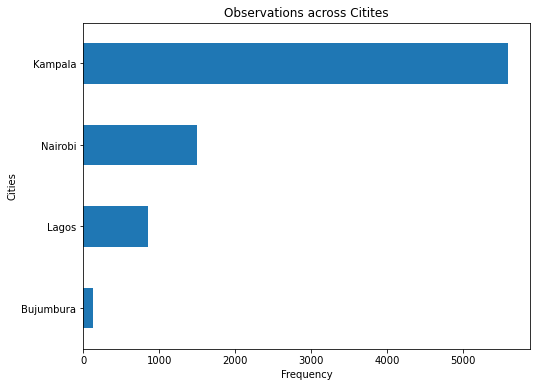

In [93]:

plt.figure(figsize=(8, 6))
df.city.value_counts().sort_values().plot(kind="barh")

plt.xlabel("Frequency")
plt.ylabel("Cities")
plt.title("Observations across Citites")

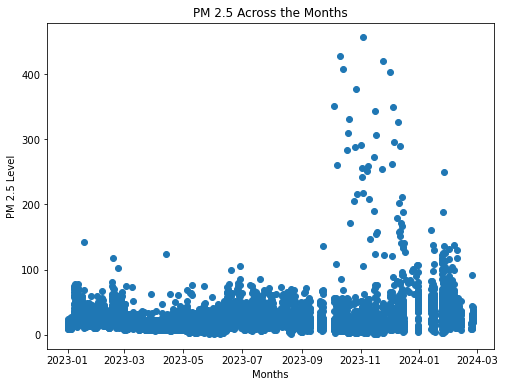

In [94]:
plt.figure(figsize=(8, 6))

plt.scatter(df.index, df["pm2_5"])


plt.xlabel("Months")
plt.ylabel("PM 2.5 Level")
plt.title("PM 2.5 Across the Months")

plt.show()


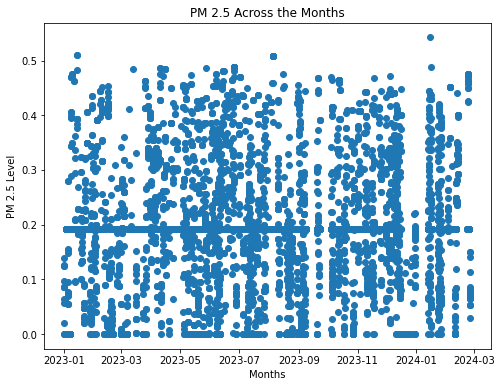

In [95]:
plt.figure(figsize=(8, 6))

plt.scatter(df.index, df["formaldehyde_cloud_fraction"])


plt.xlabel("Months")
plt.ylabel("PM 2.5 Level")
plt.title("PM 2.5 Across the Months")

plt.show()


In [96]:
"""fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].bar(df["country"], df["pm2_5"])
ax[0, 1].bar(df["city"], df["pm2_5"])
ax[1, 0].bar(df["country"], df["carbonmonoxide_co_column_number_density"])
ax[1, 1].bar(df["city"], df["pm2_5"])

plt.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(2, 2, figsize=(10, 8))\n\nax[0, 0].bar(df["country"], df["pm2_5"])\nax[0, 1].bar(df["city"], df["pm2_5"])\nax[1, 0].bar(df["country"], df["carbonmonoxide_co_column_number_density"])\nax[1, 1].bar(df["city"], df["pm2_5"])\n\nplt.tight_layout()\nplt.show()'

#### Feature Engineering

In [97]:
# Label Encoding Categorical features

lab_en = LabelEncoder()


In [98]:
X = df.drop("pm2_5", axis=1)
y = df.pm2_5

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=11)